# Data Science Final Project
Charles Laurent, Jenny Park, AJ Marino

## Part 1a - Random Forest Regressor

In [9]:
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

from sklearn import metrics

In [10]:
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:96% !important; }</style>"))

pd.set_option('display.max_columns', None)

In [11]:
# TODO - Update path to files
datadir='../dev/project/CollegeScorecard_Raw_Data'

In [12]:
# import collegedatalib
import collegedatahelper

In [13]:
data_dict = collegedatahelper.create_data_dict(datadir)

In [14]:
df = data_dict['2012_13']

In [15]:
# CONTROL 
# 1 - Public
# 2 - Private non-profit
# 3 - Private for-profit
df_pub = collegedatahelper.clean_df(df.loc[df['CONTROL'] == 1])
df_priv = collegedatahelper.clean_df(df.loc[df['CONTROL'] == 2])
df_priv_profit = collegedatahelper.clean_df(df.loc[df['CONTROL'] == 3])

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x1a1e71ee50>]],
      dtype=object)

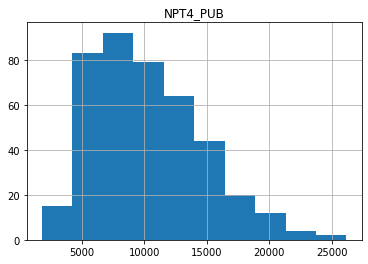

In [16]:
df_pub.hist(column='NPT4_PUB')

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x1a1e71f210>]],
      dtype=object)

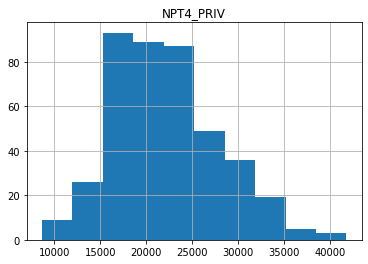

In [18]:
df_priv.hist(column='NPT4_PRIV')

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x1a5aec3150>]],
      dtype=object)

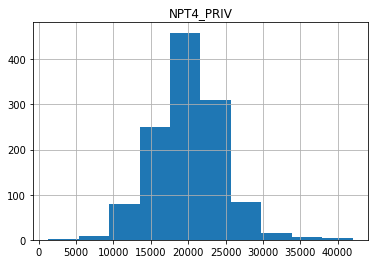

In [19]:
df_priv_profit.hist(column='NPT4_PRIV')